# PATE ( Private Aggregation of Teacher Ensembles )

__*CREDITS*__ : <br>
*NOTES* created and compiled BY SEERATPAL K. JAURA and ANJU MERCIAN <br>
*Reformatting* the text, equations and correcting typos RISHI S RAO <br>

### About the paper

With rapid adoption of machine learning, concerns have increased about privacy. Is the data,
especially sensitive data secure? <br>
To address these concerns many approaches were brought up, one promising approach is the
PATE analysis, which transfers to the destination/”Student” a model that is an aggregation of
model data trained on several different sources called the “Teacher”, the source/”Teacher” have
been trained on disjoint data. Since it is an aggregation from different sources the data is private
and the addition of noise to the answers from the source/”Teacher” guarantees additional
privacy.<br>
But PATE has been evaluated only on small data sets like MNIST data set. In this paper it is
shown how PATE can be used for large number of output classes and working on unclean data
that may possibly have errors. This paper explores new noise aggregation for source
models/Teacher models, the noisy aggregation of source/”Teacher” answers will be more
selective and there by adding less noise and provide tighter differential privacy guarantees

### Introduction

Many applications are now using machine learning to train models on highly sensitive data, for
example for diagnosis in a hospital for human treatment, modeling on personal messages. The
key challenge in such applications is to prevent models from leaking personal information, it
may seem like a non trivial task but sometimes during training the data, models may learn
some sensitive data and can reveal the information when analyzing the data with a different
data set.<br>
To prevent such mishaps of revealing sensitive information researchers have been working on
several different approaches to protect the privacy of individuals. One such recent approach is
PATE that has been able to provide some promising results. PATE has the advantage to learn
from a group of separately trained models on disjoint data set, meaning no intersection of data,
in a manner that provides intuitive privacy guarantees and is not affected by the underlying
machine learning models.

**PATE (Private Aggregation of Teacher Ensembles)​ - multiple sources (or multiple
“Teachers) are trained on disjoint sensitive data sets and uses the sources (or
“Teachers”) cumulative answers, keeping the source data hidden from the
destination/student, supervise the training of the destination model (or “Student”
model). By keeping the teachers/source data set hidden and adding carefully calibrated
Laplacian noise to the answers from the “Teachers”/source and training the destination
data set, the privacy of the source data sets are protected. In short, PATE is to protect
the privacy of training data during learning**

In this paper, the PATE technique which has previously only been applied on MNIST data set,
will be applied to a large scale data set that may possibly have erroneous labels and significant
class imbalances, to get more accurate models with both PATE’s intuitive privacy due to the
sources independent training on data sets and differential privacy guarantees. The result of this
paper is to gain: privacy, utility and practicality <br>

The primary technical contributions of this paper is to provide new mechanisms for aggregating
teachers answers that are more selective and add less noise. For example, when the teachers
disagree and a teacher does not provide consensus with others, then keeping the details of that
particular source will cause privacy leakage hence such disagreements are omitted. Also,
sometimes a source may not give results since the destination may already be predicting the
right answer, such results are omitted too

The previous paragraph suggests how privacy is protected at the aggregation step. The second
step is to add noise to the answers from the sources, instead of adding Laplacian noise, this
paper samples adding Gaussian noise, since the Gaussian noise diminish far more rapidly, thus
adding less noise but guaranteeing tight privacy.<br>
This paper proposes a mechanism called Confident and Interactive Aggregator selecting
samples under certain constraints resulting in better training than training on samples uniformly
at random. Constant fraction of queries get answered.

### BACKGROUND AND OVERVIEW.

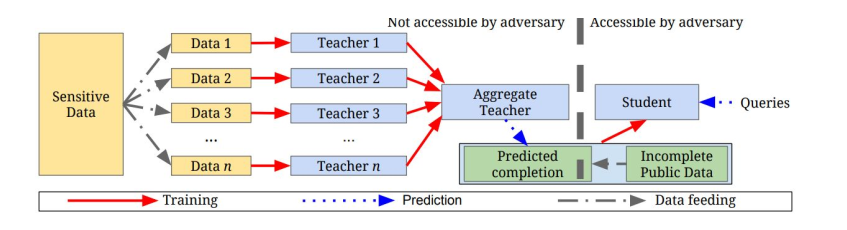

PATE consists of three key parts: 1) an ensemble of n teacher models 2) an aggregation
mechanism 2) a student model. As shown in picture <br>

**Teacher models:** Also known as the source mode. Each teacher is a model trained
independently on a subset of the data whose privacy one wishes to protect. The data is
partitioned to ensure no pair of teachers will have trained on overlapping data. Any learning
technique suitable for the data can be used for any teacher. Training each teacher on a partition
of the sensitive data produces n different models solving the same task. At inference, teachers
independently predict labels.<br>

**Aggregation mechanism:** When there is a strong consensus among teachers, the label they
almost all agree on does not depend on the model learned by any given teacher. Hence, this
collective decision is intuitively private with respect to any given training point—because such a
point could have been included only in one of the teachers’ training set. To the collective
answers, the original PATE analysis, would count the number of votes to the given label and
add Laplacian noise to the result and output the the class with the most noisy votes as the
prediction.
Excerpt from the paper:
For samples x and classes 1, . . . , m, let $f_j(x) \in [m]$ denote the j-th teacher model’s prediction
and $n_i$ denote the vote count for the i-th class (i.e., $n_i , |f_j (x) = i|)$. The output of the mechanism
is A(x) , $argmax_i (n_i(x) + Lap (1/\gamma))$. Through a rigorous analysis of this mechanism, the PATE
framework provides a differentially private API: the privacy cost of each aggregated prediction
made by the teacher ensemble is known.

**Student Model:** PATE’s final step involves training of the destination/student by knowledge
transfer from the teacher aggregation using access to public unlabeled data. To limit the privacy
cost of labeling them, queries are only made to the aggregation mechanism for a subset of
public data to train the student in a semi-supervised way using fixed queries.

### DIFFERENTIAL PRIVACY

**Original differential privacy by DWork** <br>
Definition A randomized mechanism M with domain D and range R satisfies (ε, δ)-differential
privacy if for any two adjacent inputs $D, D_0 ∈ D$ and for any subset of outputs S ⊆ R it holds
that:$$ Pr[M(D) ∈ S] ≤ e^ε · Pr[M(D_0 ) ∈ S] + δ.$$
ε is an upper bound on the loss of privacy, and δ is the probability with which this guarantee
may not hold

**RÉNYI DIFFERENTIAL PRIVACY(RDP)** <br>
Nicolas Papernot’s paper noted that using natural approach to bounding PATE’s privacy loss,
by bounding the privacy cost of each label queried and using strong composition to derive the
total cost yield loose privacy guarantees instead they used data-dependent privacy approach.
Data dependent approach takes advantage of the when the consensus to the labels among the
teachers are very strong the outcome has overwhelming likelihood of overall consensus to the
label with a very small privacy cost

**Renyi Differential Privacy definitions:**<br>
(Rényi Divergence). The Rényi divergence of order λ > 1 between two distributions P
and Q is defined as:  

$$D_\lambda \stackrel{\Delta}{=} \frac{1}{\lambda-1} \log(E_{x ~ Q}) \left(\frac{P(x)}{Q(x)} \right)^\lambda$$

(Rényi Differential Privacy (RDP)). A randomized mechanism $\mathscr{M}$ is said to guarantee
(λ, ε)-RDP with λ ≥ 1 if for any neighboring datasets D and D'

$$D_\lambda (\mathscr{M}(D)|\mathscr{M}(D')) = \frac{1}{\lambda -1 } log(E_{xQ}) \left[ \left( \frac{P[\mathscr{M}(D)=x]}{\mathscr{M}(D')=x} \right)^{\lambda-1} \right] \leq \epsilon$$

### PATE Aggregation Mechanisms.

Aggregation component is crucial component to PATE. . It enables knowledge transfer from the
teachers to the student while enforcing privacy. We improve on the (Laplacian Noise Max)
LNMax mechanism used by Nicolas Papernot which adds Laplace noise to teacher votes and
outputs the class with the highest votes by first adding Gaussian noise instead.

**first**
​, we add Gaussian noise with an accompanying privacy analysis in the RDP framework.
This method effectively reduces the noise needed to achieve the same privacy cost per
student/destination query.

**Second**
​, the aggregation method is now selective. The teacher votes are analysed to decide
which student queries are worth answering. This takes into account both the privacy cost of
each query and its payout in improving the student’s utility. The privacy cost is the smallest
when teachers agree, and when teachers agree, the label is more likely to be correct thus being
more useful to the student.

**Third**
​, we propose and study an interactive mechanism that takes into account not only teacher
votes on a queried example but possible student predictions on that query. The teachers
answers queries of the student that are not confident on the answers and agrees on a class but
doesn't answer those of the student that are already confident. Thus reducing unnecessary
privacy loss.

### DATA-DEPENDENT PRIVACY IN PATE

A direct privacy analysis of the aggregation mechanism, for reasonable values of the noise
parameter, allows answering only few queries before the privacy cost becomes prohibitive. The
original PATE proposal used a data-dependent analysis, exploiting the fact that when the
teachers have large agreement, the privacy cost is usually much smaller than the
data-independent bound would suggest.

In this paper, they perform a data-dependent privacy analysis of the aggregation mechanism
with Gaussian noise. This change of noise distribution turns out to be technically much more
challenging than the Laplace noise case. This increased complexity of the analysis however
does not make the algorithm any more complicated and thus allows us to improve the
privacy-utility tradeoff.

An additional challenge with data dependent privacy analyses arises from the fact that the
privacy cost itself is now a function of the private data. Further, the data-dependent bound on
the privacy cost has large global sensitivity (a metric used in differential privacy to calibrate the
noise injected) and is therefore difficult to sanitize. To remedy this, we use the smooth sensitivity
framework proposed by Nissim.

### IMPROVED AGGREGATION MECHANISMS FOR PATE
The privacy guarantees from PATE stem from a good, design and analysis, of the aggregation
mechanism. In this section of the paper the details of the improvements are laid out. First the
Laplacian noise is replaced by the gaussian noise that are added to the teacher votes and
adapting to the data driven privacy analysis. Next the Confident and Interactive aggregators that
select the queries worth answering in a privacy preserving way are defined. The privacy budget
is shared between query selection and answer computation.

#### THE GNMAX AGGREGATOR AND ITS PRIVACY GUARANTEE
This section replaces the laplacian noise to gaussian noise.
This section uses the following notation. For a sample x and classes 1 to m, let $f_j (x) ∈ [m]$
denote the j-th teacher model’s prediction on x and $n_i(x)$ denote the vote count for the i-th class
(i.e., $n_i(x) = |{j: f_j (x) = i}|)$. We define a ​Gaussian NoisyMax (GNMax) aggregation​ mechanism
as:

$$\mathscr{M}_\sigma \stackrel{\Delta}{=} arg\max_i \{ n_i + \mathscr{N}(0,\sigma^2)\} $$

where N (0, σ2 ) is the Gaussian distribution with mean 0 and variance σ 2.
The aggregator outputs the prediction class after adding the gaussian noise to each vote count.
Gaussian noise is more concentrated than laplacian noise, thus improving the effectiveness of
the outcome for large data sets.

#### THE CONFIDENT-GNMAX AGGREGATOR
In this section the paper proposes a refinement of the GNMax aggregator that filters outs
queries for which the teachers don't have a consensus. Basically if the teachers don't agree on
a particular label then omit that label out. This helps reduce privacy loss by having the teachers
reply to less queries.

To choose the queries with the most consensus, the model checks against a Threshold T, if the
vote count is greater than T, accept the votes else discard. To protect the privacy the if
statement uses the $\sigma_{1}^{2}$ and then applies the GNMax function on $\sigma_{2}^{2}$
In practise we often choose a higher value for $\sigma_{1}^{2}$ compared to $\sigma_{2}^{2}$
To make sure the consensus is strong.

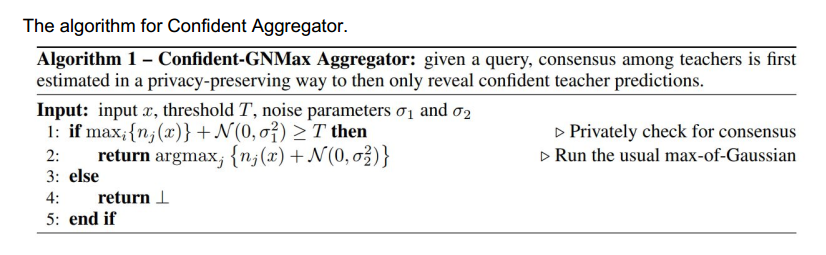

#### THE INTERACTIVE-GNMAX AGGREGATOR
While the Confident Aggregator excludes the expensive queries, it ignores the possibility that
the student may receive labels learning that may contribute little to the learning and thus to the
performance. For this, the paper proposes ​Interactive Aggregator​ that discards queries where
the student already confidently predicts the same label as the teachers.

Given a set of queries, the Interactive Aggregator (Algorithm 2) selects those answered by
comparing student predictions to teacher votes for each class. Similar to Step 1 in the Confident
Aggregator, queries where the differences between the noises crosses a threshold are
answered with GNMax. This noisy threshold suffices to enforce privacy of the first step because
student predictions can be considered public information (the student is trained in a differentially
private manner).<br>
For queries that fail this check, the mechanism reinforces the predicted student label if the
student is confident enough and does this without looking at teacher votes again. This limited
form of supervision comes at a small privacy cost. Moreover, the order of the checks ensures
that a student falsely confident in its predictions on a query is not accidentally reinforced if it
disagrees with the teacher consensus. ​The privacy accounting is identical to the Confident
Aggregator except in considering the difference between teachers and the student instead of
only the teachers votes.<br>
**In practice, the Confident Aggregator can be used to start training a student when it can
make no meaningful predictions and training can be finished off with the Interactive
Aggregator after the student gains some proficiency.**

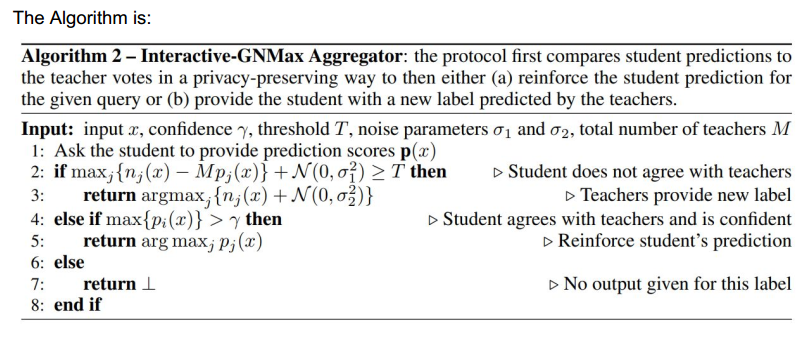

Given a set of queries, the Interactive Aggregator (Algorithm 2) selects those answered by
comparing student predictions to teacher votes for each class. Similar to Step 1 in the Confident
Aggregator, queries where the differences between the noises crosses a threshold are
answered with GNMax. This noisy threshold suffices to enforce privacy of the first step because
student predictions can be considered public information (the student is trained in a differentially
private manner).<br>
For queries that fail this check, the mechanism reinforces the predicted student label if the
student is confident enough and does this without looking at teacher votes again. This limited
form of supervision comes at a small privacy cost. Moreover, the order of the checks ensures
that a student falsely confident in its predictions on a query is not accidentally reinforced if it
disagrees with the teacher consensus. ​The privacy accounting is identical to the Confident
Aggregator except in considering the difference between teachers and the student instead of
only the teachers votes.<br>
**In practice, the Confident Aggregator can be used to start training a student when it can
make no meaningful predictions and training can be finished off with the Interactive
Aggregator after the student gains some proficiency.**

### Experimental Evaluation
In this experiment evaluation our goal is to show the application of PATE to uncrated data by
introducing improved aggregators (as discussed in section 4). We will experiment with Glyph
dataset to address two aspects:
a. Performance of PATE on task with large number of classes
b. Offers private-utility trade off on data having imbalanced and partially mislabeled
classes.<br>

#### Experimental Setup
MNIST, SVHN ad UCI adult database: The source code and supporting data is present on
https://github.com/tensorflow/models/tree/master/research/differential_privacy​. For MINST,
SVHN teachers are convolutional network trained on partition data. For UCI adult, teacher is
random forest. The MNIST and SVHN students are convolutional network trained on
semi-supervised learning with GAN while students for adult dataset are fully supervised random
forest. The test set is split into two halves having unlabeled inputs to simulate student public
data in the first half and second half is used to evaluate test performance.
Glyph​: Glyph is an optical character recognition task which has ​an order of magnitude more
classes ​than all previous applications of PATE.<br><br>
**Characteristics of Glyph dataset
:**<br>
1. It is imbalanced and some inputs are mislabeled.
2. Glyph is not public but similar dataset is public as part of nonMNIST dataset.
3. Each input is 28*28 grayscale image having single glyph generated from a collection of 500K computer fonts.<br><br>

The task is to classify input as one of 150 Unicode symbols used to generate them. These 150
classes re resulted from various pre-processing efforts such as discarding some classes having
few samples, merging classes that are too ambiguous for even a human to differentiate them
and by manual inspection of sample grouped by classes.
There are some specifications. Data was originally marked as training set into positions given to
teacher. Each teacher is a Resnet made of 32 leaky relu layers. On batch of 100 inputs using
SGD with momentum. The learning rate was changed with number of steps(e.g.: 0.1 initially,
0.01 after 10K steps and 0.001 in 20K steps.)Student architecture is convolutional network in a
semi-supervised fashion with VAT( Virtual Adversarial Training)

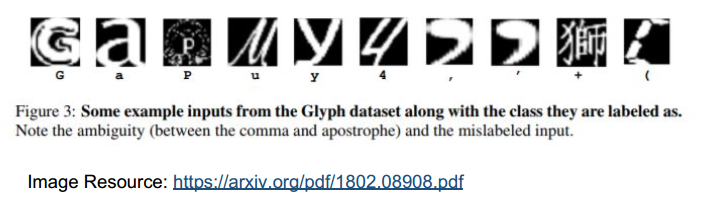

#### Comparing LNMax and GNMax mechanism
To study the trade-off privacy and accuracy between two mechanism(GNMax and LNMax
mechanism). The experiment was run training contain M teachers where M ∈
{100,500,1000,5000} on Glyph data. For each mechanism, (ε, δ) is computed to hold differential
privacy. On order of 10^8 samples, δ=10^(-8) and ε is privacy cost. The total ε calculated
represents the number of labels needed by student for accurate training.

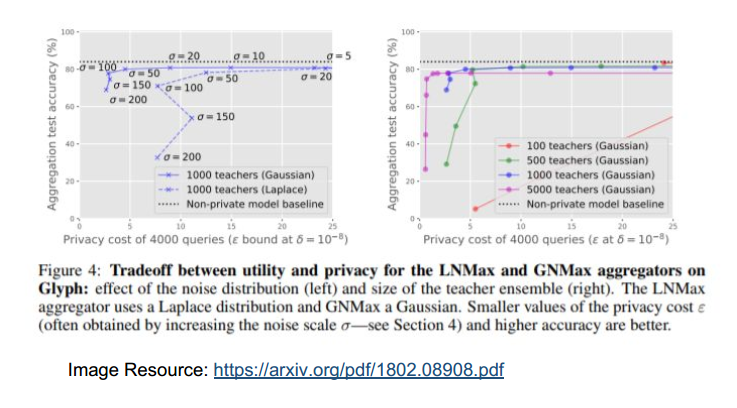

**Observation**:
From fig.1 it can be noticed that GNMax aggregators outperforms (in terms of privacy cost) the
LNMax aggregators used by original PATE proposal. On 1000 teachers of varying noise scale.
To explain this recall the notion from section4.1. For both mechanism data privacy cost scale
linearly with q —̃ the likelihood of an answer other than the true plurality. In case of GNMax the
value of q ̃ falls as exp(-x^2) while exp(-x) for LNMax where x is the ratio (ni ∗ −ni)/σ. Thus, we
get GNMax q ̃ ≈ e ^(-16) ≈ 10^(−7) and LNMax e^-4 ≈ 0.018. For given reduced q ̃ provides
smaller privacy cost and better utility privacy trade-off. From figure 4 it can be observed that in
case of GNMax increase in M( number of teachers) improves trade-off and lowers privacy cost.
From above made observations, the privacy cost is reduced using GNMax and training on a
large number of teachers.

#### Student training with GNMax aggregation mechanism
Students are trained on public data labelled by aggregation mechanism taking advantage of
PATE flexibility and applying best technique on each dataset. In order to evaluate the total
privacy cost associated with training the student model, the non-private baseline is compared by
training on sensitive data. The privacy bounds are computed (ε, δ) where ε is privacy cost and δ
sets according to training samples.<br><br>
**Confident GNMax Aggregator**: It is observed that on using pool of 500 to 1200 samples to
learn, students submit queries to teacher ensemble Confident GNMax aggregator. The
Confident GNMax aggregator outperforms LNMax: it reduced privacy cost ε, increase
student accuracy even on unlabeled data and avoid expensive queries.<br><br>
**Interactive GNMax Aggregators**: The utility and privacy of interactive training routine proceed
in two rounds on Glyph. Round 1 trains Confident GNMax aggregator. Grid search
targeting best privacy by answering 3400 queries (out of 6000) and privacy cost of ε ≈
0.59. In round two, students trained on 10,000 more queries using grid search, 10,422
queries in total with privacy cost of ε ≈ 0.84
Thus, confident and Interactive GNMax aggregators offers better privacy trade-off between
privacy( ε) and utility than LNMax.

#### Noisy Threshold check and privacy cost
Section 4.2 motivate the need for noisy threshold before teacher answering any query. The
experiment was run to support evaluation from Sec 5.3

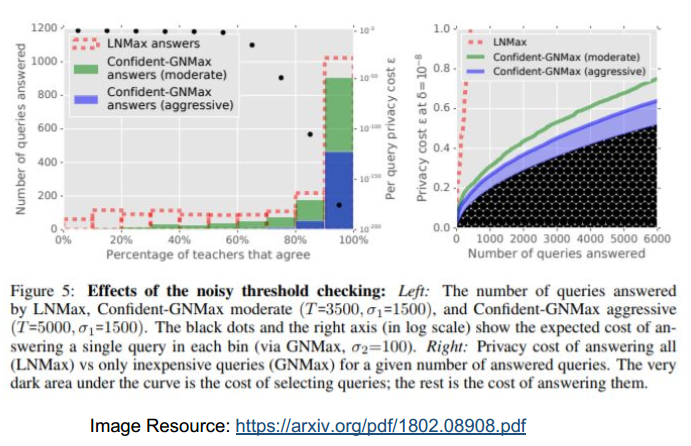

Using 5000 votes of teachers, histogram is plotted across 25,000 students queries. From figure
5, it is noticed that smaller values refers to weaker teacher agreement and leads to more
expensive queries. The moderator checks ensure that the expensive queries are most likely
discarded even though it answers between 2500 to 3500 queries. Aggressive check answers
fewer queries with strong privacy and little or no cost.

### Conclusion
It is observed from above experiment that there is synergy between the privacy and accuracy of
labels output by aggregation. The labels having small privacy cost are most likely correct. As a
result, more quality supervision is provided to students by choosing not to output labels when
consensus among teachers are too low.